In [2]:
using Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`


Define some parameters for our example

In [3]:
k1=1
k2=k1+1
c1=-1
c2=1
gammaConst=2/sqrt(pi)

1.1283791670955126

The [`SpecialFunctions`](https://github.com/JuliaMath/SpecialFunctions.jl) package allows us to use special functions like `erf`:

In [4]:
using SpecialFunctions

# Check that SpecialFunctions' erf agrees with our expectations
erf(0) ≈ 0.0
erf(1e4) ≈ 1.0

true

For a given combination of parameters, only one boundary curve for the self-similar solution to the Stefan problem is possible; the constant factor is the root of `rootEqn`:

In [5]:
function rootEqn(alpha, k1=1, k2=k1+1, c1=-1, c2=-1, gammaConst=2/sqrt(pi))
    sk1 = sqrt(k1)
    sk2 = sqrt(k2)
    A1 = sk1 * c1 * exp(-(alpha*alpha)/(4*k1)) / erf(alpha / (2sk1))
    A2 = sk2 * c2 * exp(-(alpha*alpha)/(4*k2)) / (1-erf(alpha / (2sk2)))
    A3 = (gammaConst*sqrt(pi)/2)*alpha
    A1 + A2 + A3
end

rootEqn (generic function with 6 methods)

In [6]:
# Check if rootEqn is type stable
@code_warntype rootEqn(1.0)

Body::Float64
│╻╷╷ rootEqn2 1 ─ %1 = (Base.Math.sqrt_llvm)(3.141592653589793)::Float64
││╻   /  │   %2 = (Base.div_float)(2.0, %1)::Float64
││    │   %3 = invoke #self#(_2::Float64, 1::Int64, 2::Int64, -1::Int64, -1::Int64, %2::Float64)::Float64
│     └──      return %3


Let's take a look at the graph of this function using PyPlot

In [7]:
using PyPlot

┌ Info: Recompiling stale cache file /Users/jgoldfar/.julia/compiled/v0.7/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1185


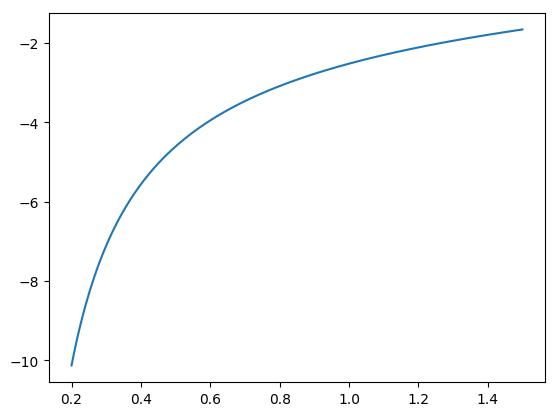

In [15]:
x = range(0.2, stop=1.5, length=Int(2e2))
withfig(figure()) do
    plot(x, map(rootEqn, x))
end

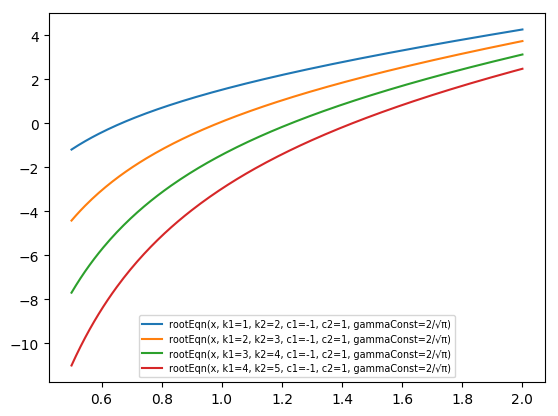

In [17]:
x = range(0.5, stop=2, length=Int(2e2))
k1range = 1:4
withfig(figure()) do
    for k1 in k1range
        plot(x, map(t->rootEqn(t, k1, k1 + 1, -1, 1, 2/sqrt(pi)), x))
    end
    legend(["rootEqn(x, k1=$(k1), k2=$(k1 + 1), c1=-1, c2=1, gammaConst=2/√π)" for k1 in k1range], loc=8, fontsize="x-small")
end

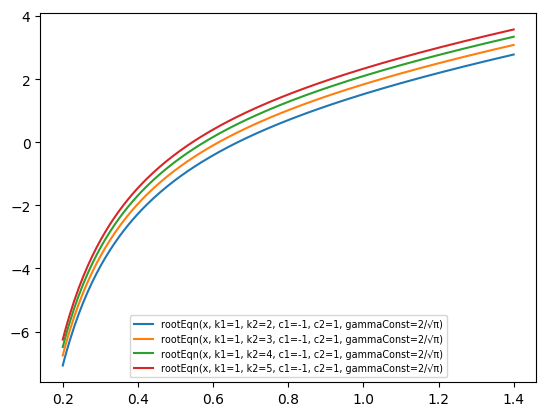

In [18]:
x = range(0.2, stop=1.4, length=Int(2e2))
k2DiffRange = 1:4
k1=1
withfig(figure()) do
    for k2Diff in k2DiffRange
        plot(x, map(t->rootEqn(t, k1, k1 + k2Diff, -1, 1, 2/sqrt(pi)), x))
    end
    legend(["rootEqn(x, k1=$(k1), k2=$(k1 + k2Diff), c1=-1, c2=1, gammaConst=2/√π)" for k2Diff in k2DiffRange], loc=8, fontsize="x-small")
end

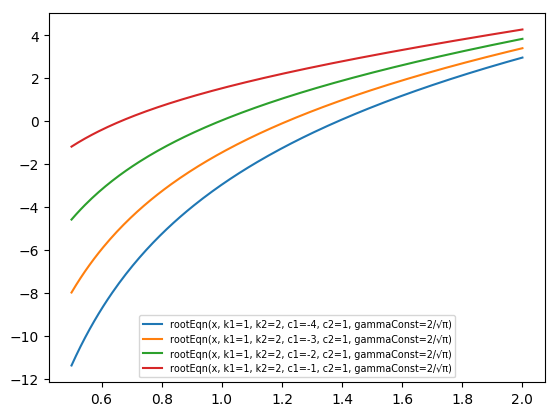

In [19]:
x = range(0.5, stop=2, length=Int(2e2))
c1range = -4:-1
k1=1
k2Diff=1
withfig(figure()) do
    for c1 in c1range
        plot(x, map(t->rootEqn(t, k1, k1 + k2Diff, c1, 1, 2/sqrt(pi)), x))
    end
    legend(["rootEqn(x, k1=$(k1), k2=$(k1 + k2Diff), c1=$(c1), c2=1, gammaConst=2/√π)" for c1 in c1range], loc=8, fontsize="x-small")
end

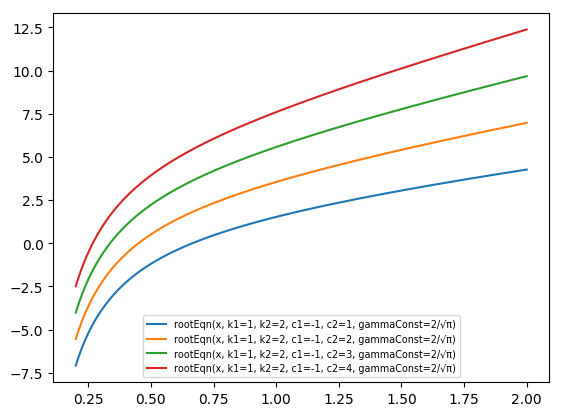

In [20]:
x = range(0.2, stop=2, length=Int(2e2))
c2range = 1:4
k1=1
k2Diff=1
c1=-1
withfig(figure()) do
    for c2 in c2range
        plot(x, map(t->rootEqn(t, k1, k1 + k2Diff, c1, c2, 2/sqrt(pi)), x))
    end
    legend(["rootEqn(x, k1=$(k1), k2=$(k1 + k2Diff), c1=$(c1), c2=$(c2), gammaConst=2/√π)" for c2 in c2range], loc=8, fontsize="x-small")
end

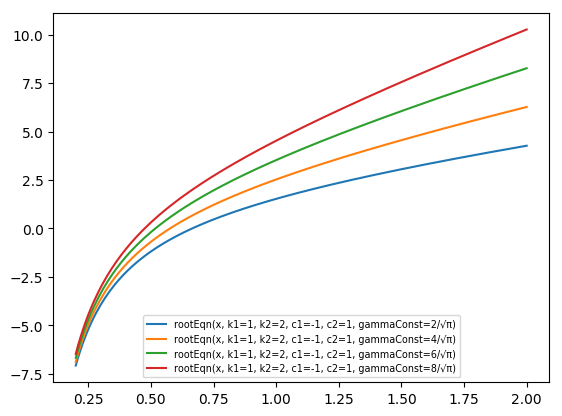

In [21]:
x = range(0.2, stop=2, length=Int(2e2))
gammaConstRange = 1:4
k1=1
k2Diff=1
c1=-1
c2=1
withfig(figure()) do
    for gammaMod in gammaConstRange
        plot(x, map(t->rootEqn(t, k1, k1 + k2Diff, c1, c2, gammaMod*2/sqrt(pi)), x))
    end
    legend(["rootEqn(x, k1=$(k1), k2=$(k1 + k2Diff), c1=$(c1), c2=$(c2), gammaConst=$(gammaMod*2)/√π)" for gammaMod in gammaConstRange], loc=8, fontsize="x-small")
end